In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

import os
import json
import requests

from urllib.request import urlretrieve


In [2]:
#url_address = 'https://data.seattle.gov/resource/4xy5-26gy.json'

#resp = requests.get(url_address)

#result = resp.json()


#data = pd.DataFrame(requests.get(url_address).json())

#data = data.set_index('date')
#data.index = pd.to_datetime(data.index)
#data = data.sort_index()
#data = data.astype(dtype='float')
#data.dtypes 

#data.iloc[:100, :2]
#data.to_csv('Fremont_bridge.csv')


#req = urllib.request.urlopen(url_address).read()
#result = json.loads(req)

#data = pd.DataFrame(result, index =['date'])

#data.head()
#data = pd.read_csv(result, index_col = 'Date', parse_dates=True)

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_Fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv(filename, index_col = 'Date', parse_dates=True)
    data.columns = ['West', 'East']
    data['Total'] = data['West'] + data['East']
    return data


In [3]:
data = get_Fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


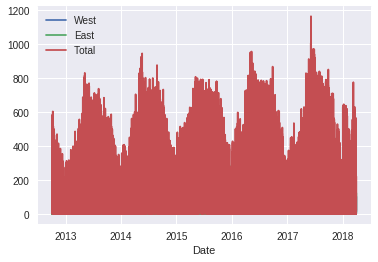

In [4]:
data.plot()

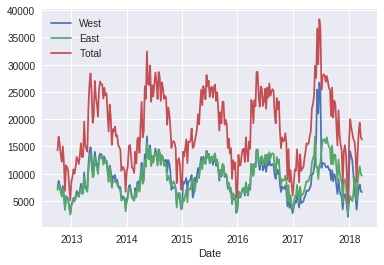

In [5]:
data.resample('W').sum().plot()

(0, 1103496.0)

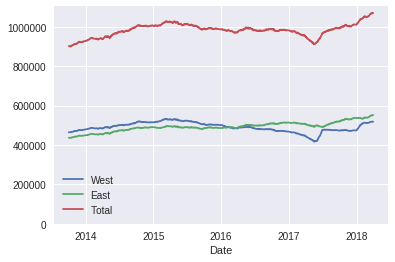

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

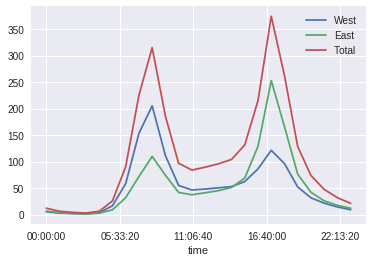

In [7]:
data.groupby(data.index.time).mean().plot()

In [8]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


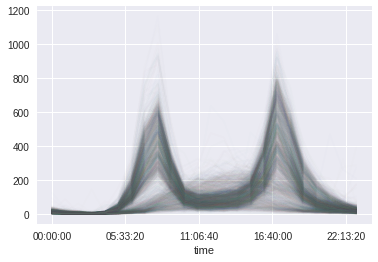

In [9]:
pivoted.plot(legend=False, alpha = 0.01)